# Assignment 1, Deep Learning Fundamentals

###

In [1]:
### goal
## for improvement need to write the goal to improve with the scientific purpose - 
## How to get best learning rate / hyperparameter and how to evalutae and explain the results.

## Import Library

In [2]:
from __future__ import print_function
import pandas as pd
import numpy as np
import torch
import plotly
import matplotlib.pyplot as plt

## Import dataset

In [3]:
db_df = pd.read_csv('sc/diabetes.csv')

In [4]:
## view top 5 rows
db_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
## show the statistic summary
db_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### EDA

In [6]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def plot_boxplot_facet(df):
    
    # create the 
    fig = make_subplots(rows=len(df.columns), cols=1)

    for j,i in enumerate(df.columns):
        fig.add_trace(go.Box(
            x=df[i],
            name= i,
            boxpoints='suspectedoutliers', # only suspected outliers
            marker=dict(
                color='rgb(8,81,156)',
                outliercolor='rgba(219, 64, 82, 0.6)',
                line=dict(
                    outliercolor='rgba(219, 64, 82, 0.6)',
                    outlierwidth=2)),
            line_color='rgb(8,81,156)'
            ), 
            row=j+1, col= 1
            )
    
    fig.update_layout(title_text="Box Plot Styling Outliers",
                    #   width=500,
                    height=1000,
                    )
    fig.show()
    
plot_boxplot_facet(db_df)

## Read from scale data

In [7]:
# reference the original columns
df_column = ['Outcome']
df_column.extend(db_df.columns[:8])
df_column

# Define column names for the DataFrame
columns = ['label'] + [f'feature_{i}' for i in range(1, 9)]

# Read the file and create a DataFrame
db_df_scale = pd.DataFrame(columns=columns)

with open('sc/diabetes_scale.txt', 'r') as file:
    for line in file.readlines():
        tokens = line.split()
        label = int(tokens[0])
        features = [0] * 8  # Adjust according to the actual number of features
        for token in tokens[1:]:
            index, value = token.split(":")
            features[int(index) - 1] = float(value)
        db_df_scale = db_df_scale.append(pd.Series([label] + features, index=columns), ignore_index=True)

db_df_scale.columns = df_column
db_df_scale

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1.0,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333
1,1.0,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667
2,-1.0,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333
3,1.0,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000
4,-1.0,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000
...,...,...,...,...,...,...,...,...,...
763,1.0,0.176471,0.015075,0.245902,-0.030303,-0.574468,-0.019374,-0.920581,0.400000
764,1.0,-0.764706,0.226131,0.147541,-0.454545,-1.000000,0.096870,-0.776260,-0.800000
765,1.0,-0.411765,0.216080,0.180328,-0.535354,-0.735225,-0.219076,-0.857387,-0.700000
766,-1.0,-0.882353,0.266332,-0.016393,-1.000000,-1.000000,-0.102832,-0.768574,-0.133333


In [8]:
plot_boxplot_facet(db_df_scale)

## Perceptron Algorithm

In [9]:
### Step 1: Import Necessary Libraries
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

### Step 2: Preprocess the Data

# Separate features and labels
X = db_df_scale.drop('Outcome', axis=1)  # Replace 'outcome' with the actual column name of your outcome variable
y = db_df_scale['Outcome']
# print(X,y)


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1311)
# print(X_train)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32).view(-1, 1)
# print(X_train_tensor,y_train_tensor)

# Create DataLoaders for training and testing data
train_data = TensorDataset(X_train_tensor, y_train_tensor)
torch.manual_seed(1311)
# train_loader = DataLoader(dataset=train_data, batch_size=32, shuffle=True)
train_loader = DataLoader(dataset=train_data, shuffle=True)

test_data = TensorDataset(X_test_tensor, y_test_tensor)
# test_loader = DataLoader(dataset=test_data, batch_size=32)
test_loader = DataLoader(dataset=test_data)

### Step 3: Define the Single-Layer Perceptron Model
class SingleLayerPerceptron(nn.Module):
    def __init__(self, input_size):
        super(SingleLayerPerceptron, self).__init__()
        self.layer = nn.Linear(input_size, 1)
        
    def forward(self, x):
        x = torch.sigmoid(self.layer(x))
        return x
    
### Step 4: Instantiate the Model, Loss Criterion, and Optimizer
model = SingleLayerPerceptron(input_size=8)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.03)  # You can adjust the learning rate

### Step 5: Train the Model
num_epochs = 1000
cost_slp = []  # List to store the total loss at each epoch

for epoch in range(num_epochs):
    total_loss = 0  # Variable to store the total loss for the current epoch
    
    for i, (features, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(features)
        
        # Compute loss
        loss = criterion(outputs, labels)
        
        # Zero gradients, perform a backward pass, and update the weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Accumulate the loss for this batch of data
        total_loss += loss.item()

    # Append the total loss for this epoch to the cost list
    cost_slp.append(total_loss)

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        
        
### Step 6: Evaluate the Model
with torch.no_grad():
    correct = 0
    total = 0
    for features, labels in test_loader:
        outputs = model(features)
        predicted = torch.round(outputs)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the model on the test data: {100 * correct / total}%')


Epoch [1/1000], Loss: 0.1544
Epoch [101/1000], Loss: -4.5676
Epoch [201/1000], Loss: 0.0489
Epoch [301/1000], Loss: -7.5064
Epoch [401/1000], Loss: -32.3832
Epoch [501/1000], Loss: 1.0948
Epoch [601/1000], Loss: 1.2905
Epoch [701/1000], Loss: 0.0000
Epoch [801/1000], Loss: 20.3373
Epoch [901/1000], Loss: 0.0000
Accuracy of the model on the test data: 32.467532467532465%


In [10]:
def show_loss(cost):
    # Plot the cost (loss) over epochs
    plt.plot(cost, marker='o', linestyle='-', color='b', label='Training Loss')

    # Set labels and title
    plt.xlabel('Epochs')
    plt.ylabel('Cross Entropy Loss')
    plt.title('Training Progress - Cross Entropy Loss')

    # Add grid for better readability
    plt.grid(True)

    # Show legend
    plt.legend()

    # Display the plot
    plt.show()

## MLP Algorithm

In [11]:
### Step 3: Define the Single-Layer Perceptron Model
class MultilayerPerceptron(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MultilayerPerceptron, self).__init__()
        self.input_size = input_size
        self.hidden_size  = hidden_size
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(self.hidden_size, 1)
        # self.ReLU = torch.nn.ReLU()
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, x):
        hidden = self.fc1(x)
        relu = self.relu(hidden)
        output = self.fc2(relu)
        # output = self.ReLU(output)
        output = self.sigmoid(output)
        return output
    

### Step 4: Instantiate the Model, Loss Criterion, and Optimizer
model = MultilayerPerceptron(input_size=8, hidden_size=32)  # Assuming 8 input features
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)  # You can adjust the learning rate

### Step 5: Train the Model
num_epochs = 1000
cost_mlp = []  # List to store the total loss at each epoch

for epoch in range(num_epochs):
    total_loss = 0  # Variable to store the total loss for the current epoch
    
    for i, (features, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(features)
        
        # Compute loss
        loss = criterion(outputs, labels)
        
        # Zero gradients, perform a backward pass, and update the weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Accumulate the loss for this batch of data
        total_loss += loss.item()

    # Append the total loss for this epoch to the cost list
    cost_mlp.append(total_loss)

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        
        
### Step 6: Evaluate the Model
with torch.no_grad():
    correct = 0
    total = 0
    for features, labels in test_loader:
        outputs = model(features)
        predicted = torch.round(outputs)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the model on the test data: {100 * correct / total}%')

Epoch [1/1000], Loss: 14.7806
Epoch [101/1000], Loss: 0.3749
Epoch [201/1000], Loss: 0.0376
Epoch [301/1000], Loss: 0.3703
Epoch [401/1000], Loss: 0.0241
Epoch [501/1000], Loss: 0.2427
Epoch [601/1000], Loss: 0.6182
Epoch [701/1000], Loss: 0.6444
Epoch [801/1000], Loss: 0.0404
Epoch [901/1000], Loss: 0.0664
Accuracy of the model on the test data: 47.4025974025974%


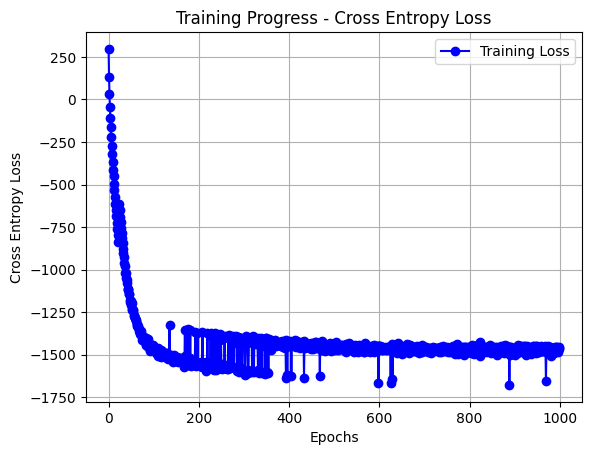

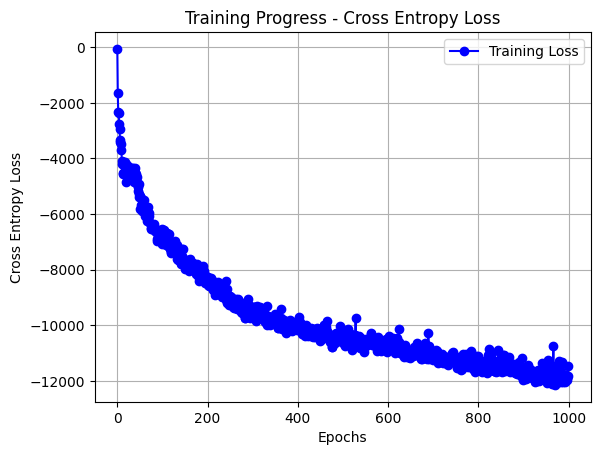

In [12]:
show_loss(cost_slp)
show_loss(cost_mlp)